In [116]:
%run imports.py

### Networks

#### Ring Network

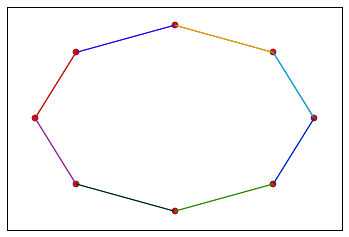

In [117]:
x = Bidirectional_Ring(8)
x.draw()

In [118]:
x.state()

[('P4', {'n': 8}),
 ('P7', {'n': 8}),
 ('P1', {'n': 8}),
 ('P6', {'n': 8}),
 ('P5', {'n': 8}),
 ('P3', {'n': 8}),
 ('P2', {'n': 8}),
 ('P0', {'n': 8})]

#### Line Network

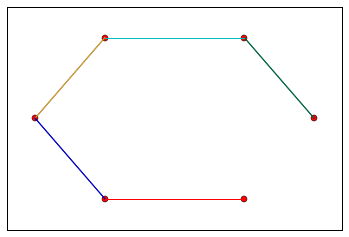

In [119]:
Bidirectional_Line(6).draw()

#### Random Line Network

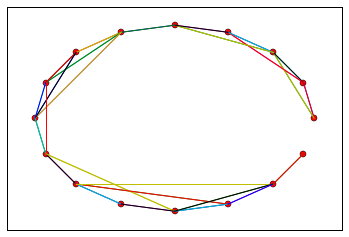

In [120]:
Random_Line_Network(16).draw()

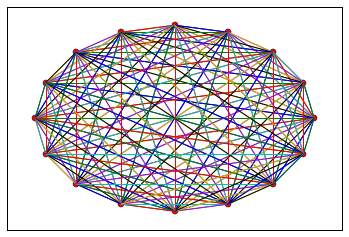

In [121]:
Random_Line_Network(16, sparsity=0).draw()

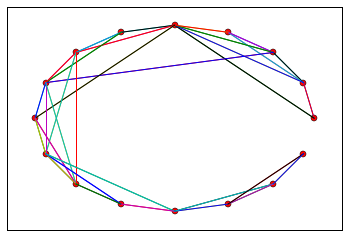

In [122]:
Random_Line_Network(16, sparsity=0.5).draw()

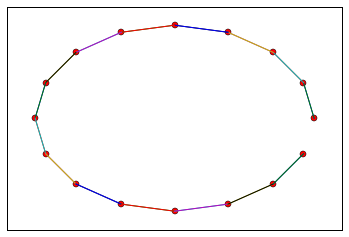

In [123]:
Random_Line_Network(16, sparsity=float('inf')).draw()

### Algorithms

#### A Basic Algorithm: LCR

In [124]:
x = Unidirectional_Ring(5)

##### Initial Network State

In [125]:
x.state()

[('P0', {'n': 5}),
 ('P1', {'n': 5}),
 ('P2', {'n': 5}),
 ('P4', {'n': 5}),
 ('P3', {'n': 5})]

In [126]:
lcr = LCR(x)

--------------
Running LCR on
[P0 -> {P1}, P1 -> {P2}, P2 -> {P4}, P4 -> {P3}, P3 -> {P0}]
Round 1
P0.status is non-leader
P3.status is non-leader
Round 2
P0.status is non-leader
P1.status is non-leader
Round 3
P1.status is non-leader
P2.status is non-leader
Round 4
P2.status is non-leader
Round 5
P4.status is leader
LCR Terminated
Message Complexity: 12
Time Complexity: 5
------------------


##### Time Complexity

In [127]:
print lcr.r, "rounds"

5 rounds


##### Message Complexity

In [128]:
print lcr.message_count, "messages"

12 messages


##### Final Network State

In [129]:
x.state()

[('P0', {'n': 5, 'status': 'non-leader'}),
 ('P1', {'n': 5, 'status': 'non-leader'}),
 ('P2', {'n': 5, 'status': 'non-leader'}),
 ('P4', {'n': 5, 'status': 'leader'}),
 ('P3', {'n': 5, 'status': 'non-leader'})]

#### Chaining Algorithms

In [130]:
x = Random_Line_Network(6)

In [131]:
#Elect a Leader
FloodMax(x, params={'verbosity': Algorithm.QUIET})

FloodMax Terminated
Message Complexity: 80
Time Complexity: 6
------------------


<datk.core.algs.FloodMax instance at 0x10ccb5128>

In [132]:
#Construct a BFS tree rooted at the Leader 
SynchBFS(x)

-------------------
Running SynchBFS on
[P3 -> {P4}, P4 -> {P3, P1}, P1 -> {P4, P0, P2, P5}, P0 -> {P1, P2, P5}, P2 -> {P1, P0, P5}, P5 -> {P1, P0, P2}]
Round 1
P5.parent is None
P1.parent is P5
P0.parent is P5
P2.parent is P5
Round 2
P4.parent is P1
Round 3
P3.parent is P4
Round 4
SynchBFS Terminated
Message Complexity: 16
Time Complexity: 4
------------------


<datk.core.algs.SynchBFS instance at 0x10c91c050>

--------------------------
Running _ConvergeHeight on


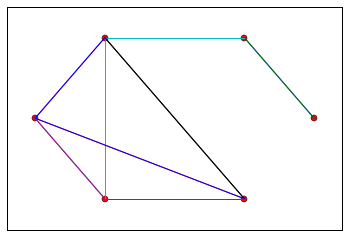

[P3 -> {P4}, P4 -> {P3, P1}, P1 -> {P4, P0, P2, P5}, P0 -> {P1, P2, P5}, P2 -> {P1, P0, P5}, P5 -> {P1, P0, P2}]
Round 1
Round 2
Round 3
Round 4
P5.height is 3
_ConvergeHeight Terminated
Message Complexity: 8
Time Complexity: 4
------------------


<datk.core.algs._ConvergeHeight instance at 0x10c91c830>

In [133]:
SynchConvergeHeight(x, params={'draw':True})

In [134]:
x.state()

[('P3', {'n': 6, 'parent': P4 -> {P3, P1}, 'status': 'non-leader'}),
 ('P4', {'n': 6, 'parent': P1 -> {P4, P0, P2, P5}, 'status': 'non-leader'}),
 ('P1', {'n': 6, 'parent': P5 -> {P1, P0, P2}, 'status': 'non-leader'}),
 ('P0', {'n': 6, 'parent': P5 -> {P1, P0, P2}, 'status': 'non-leader'}),
 ('P2', {'n': 6, 'parent': P5 -> {P1, P0, P2}, 'status': 'non-leader'}),
 ('P5', {'height': 3, 'n': 6, 'parent': None, 'status': 'leader'})]

#### Equivalently, chain them like this:

In [135]:
x = Random_Line_Network(6)
A = Chain(FloodMax(), Chain(SynchBFS(), SynchConvergeHeight()), params={'verbosity':Algorithm.QUIET})
A(x)

FloodMax Terminated
Message Complexity: 50
Time Complexity: 6
------------------
SynchBFS Terminated
Message Complexity: 10
Time Complexity: 5
------------------
_ConvergeHeight Terminated
Message Complexity: 11
Time Complexity: 5
------------------


In [136]:
x.state()

[('P1', {'n': 6, 'parent': P5 -> {P1, P3}, 'status': 'non-leader'}),
 ('P5', {'height': 4, 'n': 6, 'parent': None, 'status': 'leader'}),
 ('P3', {'n': 6, 'parent': P5 -> {P1, P3}, 'status': 'non-leader'}),
 ('P4', {'n': 6, 'parent': P3 -> {P5, P4}, 'status': 'non-leader'}),
 ('P0', {'n': 6, 'parent': P4 -> {P3, P0}, 'status': 'non-leader'}),
 ('P2', {'n': 6, 'parent': P0 -> {P4, P2}, 'status': 'non-leader'})]

### Benchmarking Algorithms

Sampling n = ... 2... , 4... , 8... , 16... , 32... , 64... , 128... , 256...  DONE


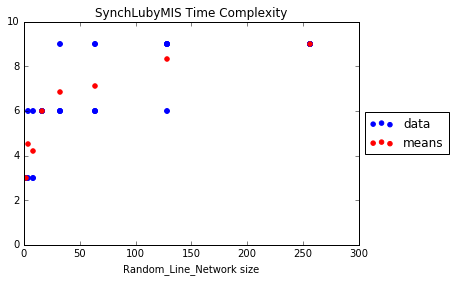

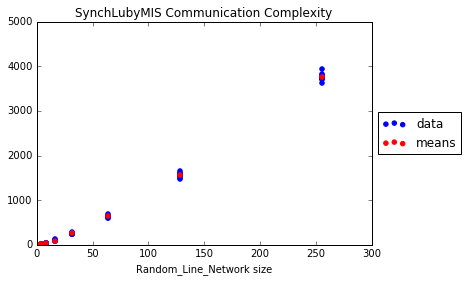

In [140]:
benchmark(SynchLubyMIS, Random_Line_Network, testLubyMIS)

In [143]:
from IPython.display import display, clear_output
import time, sys
for i in range(10):
    time.sleep(0.25)
    clear_output(wait=True)
    print(i)
    sys.stdout.flush()

9


foa
